## Import of libraries and data cleansing

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#define function to determine the percentage of patients not attending appointments by certain feature
def per_noshow(DataFrame,feature,feature_value):
    """
    Take in the feature to analyse and the value of that feature and returns the percentage 
    of no-shows. Intended to use as part of lambda function to update DataFrame.
    
    Parameters
    ----------
    df : the DataFrame to analyse
    feature : str
        feature of the DataFrame to analyse
    feature_value : scalar
        the feature_value to analyse
        
    """
    no_show = DataFrame[(DataFrame['No-show']=='Yes') & (DataFrame[feature]==feature_value)]['No-show'].count()
    total = DataFrame[DataFrame[feature]==feature_value][feature].count()
    return round((no_show / total) * 100,2)

In [3]:
# Define a class in for creating graphs.

class feat_to_analyse(object):
    """A feature from the dataframe can have a countplot and percentage of patients not
    attending appointments calculated.
    
    Attributes:
        feature: feature of the dataframe to analyse
    
    """
    def __init__(self,feature):
        self.feature = feature
    
    def graph(self,df):
        """Plot a countplot using the feature assigned from the DataFrame  
        
        Attributes:
            df: the DataFrame where the feature is
        
        """
        sns.countplot(self.feature,data=df,hue='No-show',palette='viridis')

    def percentage(self,df,x):
        """Calculate percentage of patients not attending appointments
        
        Attributes:
            df: the DataFrame where the feature is
            x: return values from the DataFrame based on a certain value
        
        """
        percentage = (sum((df[self.feature]==x) & (df['No-show']=='Yes'))/sum(df[self.feature]==x))*100
        print('Percentage of {} patients not attending appointments: {}%'.format(self.feature,round(percentage,2)))

In [4]:
# import data into dataframe
df = pd.read_csv('./input/KaggleV2-May-2016.csv')

In [5]:
#Check info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#Rename columns with spelling errors
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap'},inplace=True)

In [7]:
# Grab info about DataFrame
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Appears to be a patient with a negative age, and also an age of 115, which is perhaps unlikely. These will be removed later

In [8]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Patient ID and appointment ID are likely to be of no interest, and potentially add bias to any modelling.
Appointment Day duplicates information in Scheduled day.
These columns should be removed.
Neighbourhood may/may not be of use, so will keep until after initial analysis.

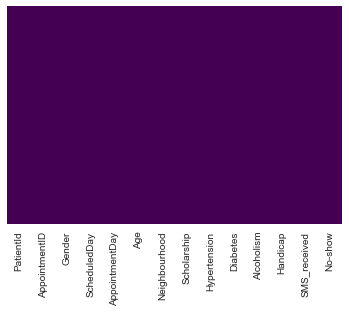

In [9]:
# Check for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Very clean dataset - no null values!

In [10]:
# Clean ages
df = df[(df['Age']>=0) & (df['Age']<100)]

In [11]:
# Drop columns
df.drop(labels=['PatientId','AppointmentID','AppointmentDay'],axis=1,inplace=True)

In [12]:
# confirm
df.head()

,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Analysis and Discussion

In [13]:
# No shows for the entire population
df['No-show'].value_counts()

No     88199
Yes    22316
Name: No-show, dtype: int64

In [14]:
#Percentage no-shows over entire population
percentage = (df[df['No-show']=='Yes']['No-show'].count()/df['No-show'].count())*100
print('Percentage of patients not attending appointments: {}%'.format(round(percentage,2)))

Percentage of patients not attending appointments: 20.19%


Features to explore
    
    - Gender and no-show
    - Co-morbidities
    - Age vs no-show
    - Day and no-show
    - Hour of day and no-show
    - Neigbourhood and no-show

### Gender

Percentage of Gender patients not attending appointments: 19.97%
Percentage of Gender patients not attending appointments: 20.31%


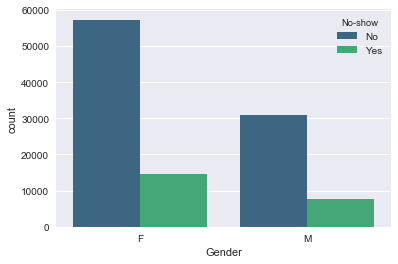

In [15]:
feature = feat_to_analyse('Gender')
feature.graph(df)
feature.percentage(df,'M')
feature.percentage(df,'F')

### Co-morbitities

Percentage of Diabetes patients not attending appointments: 18.0%


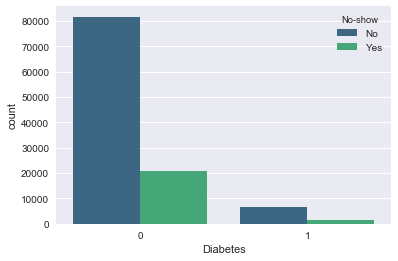

In [16]:
feature = feat_to_analyse('Diabetes')
feature.graph(df)
feature.percentage(df,1)

Percentage of Hypertension patients not attending appointments: 17.3%


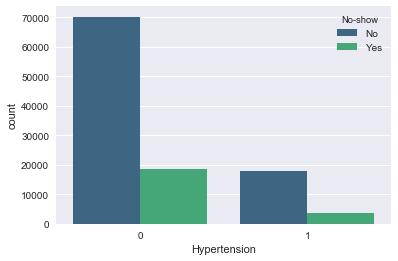

In [17]:
feature = feat_to_analyse('Hypertension')
feature.graph(df)
feature.percentage(df,1)

Percentage of Alcoholism patients not attending appointments: 20.15%


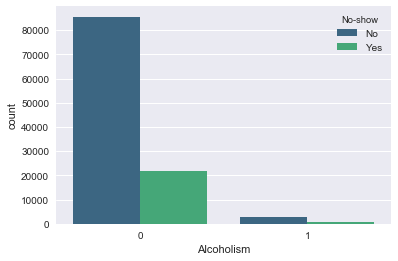

In [18]:
feature = feat_to_analyse('Alcoholism')
feature.graph(df)
feature.percentage(df,1)

From the dataset it is unclear what is meant by a value > 1 in the handicap column, so it is assumed this means the paient has multiple handicaps

Percentage of Handicap patients not attending appointments: 17.83%
Percentage of Handicap patients not attending appointments: 20.22%
Percentage of Handicap patients not attending appointments: 23.08%
Percentage of Handicap patients not attending appointments: 33.33%


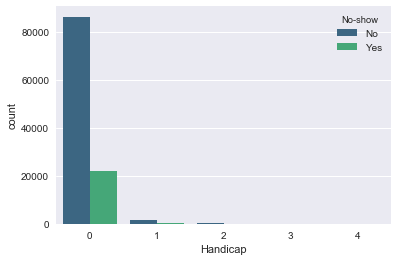

In [19]:
feature = feat_to_analyse('Handicap')
feature.graph(df)
feature.percentage(df,1)
feature.percentage(df,2)
feature.percentage(df,3)
feature.percentage(df,4)

Patients with a handicap have a higher no-show percentage than the general population. This may be due to the patients requiring greater assistance to attend appointments.

In [20]:
for i in range(0,5):
    print(df[df['Handicap']==i]['Handicap'].value_counts())

0    108280
Name: Handicap, dtype: int64
1    2036
Name: Handicap, dtype: int64
2    183
Name: Handicap, dtype: int64
3    13
Name: Handicap, dtype: int64
4    3
Name: Handicap, dtype: int64


Although it appears patients with > 1 handicaps have a much higher rate of not attending appointments on further investigation the numbers of these patients is small compared to the rest of the population then these values should not be used.

Percentage of Scholarship patients not attending appointments: 23.74%


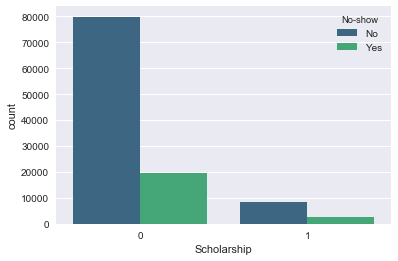

In [21]:
feature = feat_to_analyse('Scholarship')
feature.graph(df)
feature.percentage(df,1)

** Time / Day **

In [22]:
#Change scheduled day to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [23]:
df['Time'] = df['ScheduledDay'].apply(lambda time: time.time)
df['Hour'] = df['ScheduledDay'].apply(lambda time: time.hour)
df['Month'] = df['ScheduledDay'].apply(lambda time: time.month)
df['Day of Week'] = df['ScheduledDay'].apply(lambda time: time.dayofweek)

In [24]:
# Map days of the week to numbers
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [25]:
df.head()

,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Time,Hour,Month,Day of Week
0,F,2016-04-29 18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,No,<built-in method time of Timestamp object at 0...,18,4,Fri
1,M,2016-04-29 16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,No,<built-in method time of Timestamp object at 0...,16,4,Fri
2,F,2016-04-29 16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,No,<built-in method time of Timestamp object at 0...,16,4,Fri
3,F,2016-04-29 17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,<built-in method time of Timestamp object at 0...,17,4,Fri
4,F,2016-04-29 16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,No,<built-in method time of Timestamp object at 0...,16,4,Fri


In [26]:
df['Day of Week'].value_counts()

Tue    26166
Wed    24262
Mon    23079
Fri    18913
Thu    18071
Sat       24
Name: Day of Week, dtype: int64

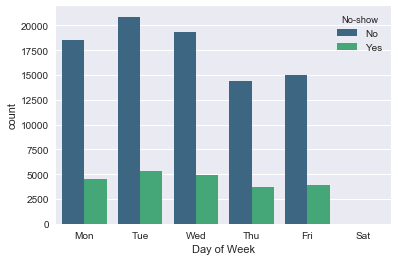

In [27]:
sns.countplot(x='Day of Week',data=df,hue='No-show',
              order=['Mon','Tue','Wed','Thu','Fri','Sat'],palette='viridis')

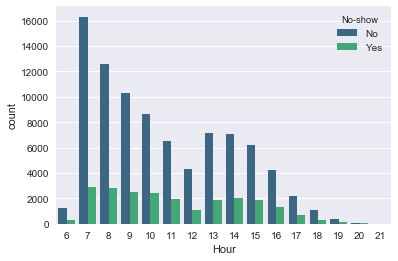

In [28]:
sns.countplot(x='Hour',data=df,hue='No-show',palette='viridis')

In [29]:
df_time = pd.DataFrame(df['Hour'].value_counts())

In [30]:
df_time.sort_index(inplace=True)
df_time.reset_index(inplace=True)
df_time.rename(columns={'Hour':'Count','index':'Hour'},inplace=True)

In [31]:
df_time['No-Show Percent'] = df_time['Hour'].apply(lambda x: per_noshow(df,'Hour',x))

In [32]:
df_time

,Hour,Count,No-Show Percent
0,6,1578,19.20
1,7,19212,15.15
2,8,15348,18.27
3,9,12819,19.69
4,10,11055,22.07
5,11,8462,22.78
6,12,5422,20.36
7,13,9036,20.93
8,14,9125,22.67
9,15,8078,23.19


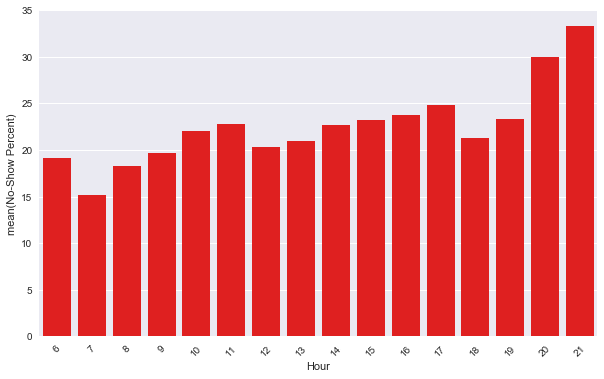

In [33]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.barplot(x='Hour',y='No-Show Percent',data=df_time,color='red')

There is an overall trend of an increased percentage of no-show patients throughout the day. However the large increase at the end of the day is negated by there only being 3 data points at 21:00.

** Age **

In [34]:
def set_age_group(x):
    """Set an age range
    """
    if x <=3:
        return 'infant',0
    elif x <=10:
        return 'child',1
    elif x <=18:
        return 'adolescent',2
    elif x <= 25:
        return 'Young Adult',3
    elif x <= 45:
        return 'Adult',4
    elif x <= 75:
        return 'Middle Aged',5
    else:
        return 'Elderly',6

In [35]:
df['Age_Range'] = df['Age'].apply(lambda x: set_age_group(x))

In [36]:
df.head()

,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Time,Hour,Month,Day of Week,Age_Range
0,F,2016-04-29 18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,No,<built-in method time of Timestamp object at 0...,18,4,Fri,"(Middle Aged, 5)"
1,M,2016-04-29 16:08:27,56,JARDIM DA PENHA,0,0,0,0,0,0,No,<built-in method time of Timestamp object at 0...,16,4,Fri,"(Middle Aged, 5)"
2,F,2016-04-29 16:19:04,62,MATA DA PRAIA,0,0,0,0,0,0,No,<built-in method time of Timestamp object at 0...,16,4,Fri,"(Middle Aged, 5)"
3,F,2016-04-29 17:29:31,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,<built-in method time of Timestamp object at 0...,17,4,Fri,"(child, 1)"
4,F,2016-04-29 16:07:23,56,JARDIM DA PENHA,0,1,1,0,0,0,No,<built-in method time of Timestamp object at 0...,16,4,Fri,"(Middle Aged, 5)"


In [37]:
df['Age_Range'].value_counts()

(Middle Aged, 5)    37549
(Adult, 4)          28986
(adolescent, 2)     10117
(child, 1)           9806
(Young Adult, 3)     9733
(infant, 0)          8943
(Elderly, 6)         5381
Name: Age_Range, dtype: int64

In [38]:
# Create a DataFrame with value counts of patients ages
df_ages = pd.DataFrame(df['Age_Range'].value_counts())

In [39]:
# Clean up DataFrame
df_ages.reset_index(inplace=True)
df_ages['Description'],df_ages['Rank'] = zip(*df_ages['index'])
df_ages.set_index('Rank',inplace=True)
df_ages.sort_index(inplace=True)
df_ages.rename(columns={'Age_Range':'Count'},inplace=True)

In [40]:
df_ages

,index,Count,Description
Rank,,,
0,"(infant, 0)",8943,infant
1,"(child, 1)",9806,child
2,"(adolescent, 2)",10117,adolescent
3,"(Young Adult, 3)",9733,Young Adult
4,"(Adult, 4)",28986,Adult
5,"(Middle Aged, 5)",37549,Middle Aged
6,"(Elderly, 6)",5381,Elderly


In [41]:
# Add a column of the percentage of patients No-show
df_ages['No-Show Percent'] = df_ages['index'].apply(lambda x: per_noshow(df,'Age_Range',x))

In [42]:
df_ages.head()

,index,Count,Description,No-Show Percent
Rank,,,,
0,"(infant, 0)",8943,infant,17.70
1,"(child, 1)",9806,child,22.49
2,"(adolescent, 2)",10117,adolescent,25.29
3,"(Young Adult, 3)",9733,Young Adult,25.39
4,"(Adult, 4)",28986,Adult,21.96


In [43]:
df_ages.describe()

,Count,No-Show Percent
count,7.000000,7.000000
mean,15787.857143,20.804286
std,12298.343986,3.956597
min,5381.000000,16.110000
25%,9338.000000,17.195000
50%,9806.000000,21.960000
75%,19551.500000,23.890000
max,37549.000000,25.390000


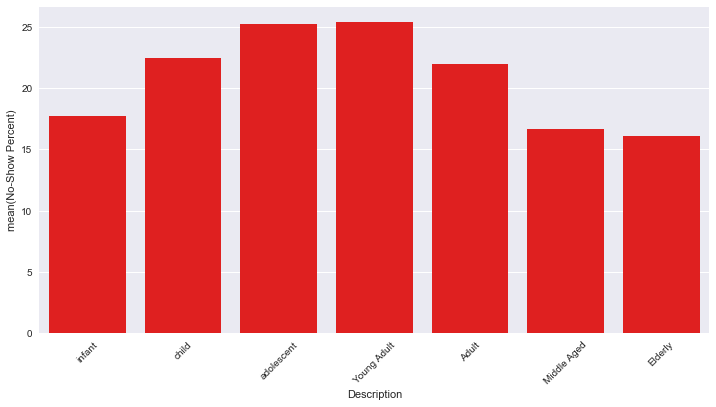

In [44]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.barplot(x='Description',y='No-Show Percent',data=df_ages,color='red')

Adolescents and young adults are increasingly likely to miss appointments. This makes sense as younger children will probably be brought by their parents. The percentage then decreases with age.

It may be of interest to analyse if there are any differences between patients gender with respect to their age.

In [45]:
# Create a DataFrame with just male patients
df_ages_M_initial = df[df['Gender']=='M']
#Apply same processing as previosuly
df_ages_M = pd.DataFrame(df_ages_M_initial['Age'].value_counts())
df_ages_M.sort_index(inplace=True)
df_ages_M.reset_index(inplace=True)
df_ages_M.rename(columns={'Age':'Male','index':'Age'},inplace=True)
df_ages_M['No-Show Percent Male'] = df_ages_M['Age'].apply(lambda x: per_noshow(df_ages_M_initial,'Age',x))


In [46]:
df_ages_M.head()

,Age,Male,No-Show Percent Male
0,0,1818,17.60
1,1,1185,17.97
2,2,861,16.38
3,3,749,17.89
4,4,682,20.97


In [47]:
# Do the same for female patients
df_ages_F_initial = df[df['Gender']=='F']
df_ages_F = pd.DataFrame(df_ages_F_initial['Age'].value_counts())
df_ages_F.sort_index(inplace=True)
df_ages_F.reset_index(inplace=True)
df_ages_F.rename(columns={'Age':'Female','index':'Age'},inplace=True)
df_ages_F['No-Show Percent Female'] = df_ages_F['Age'].apply(lambda x: per_noshow(df_ages_F_initial,'Age',x))

In [48]:
df_ages_F.head()


,Age,Female,No-Show Percent Female
0,0,1721,18.54
1,1,1088,18.57
2,2,757,14.66
3,3,764,18.72
4,4,617,22.53


In [49]:
df_ages_Combined = df_ages_F.merge(df_ages_M,on='Age')

In [50]:
df_ages_Combined.head()

,Age,Female,No-Show Percent Female,Male,No-Show Percent Male
0,0,1721,18.54,1818,17.60
1,1,1088,18.57,1185,17.97
2,2,757,14.66,861,16.38
3,3,764,18.72,749,17.89
4,4,617,22.53,682,20.97


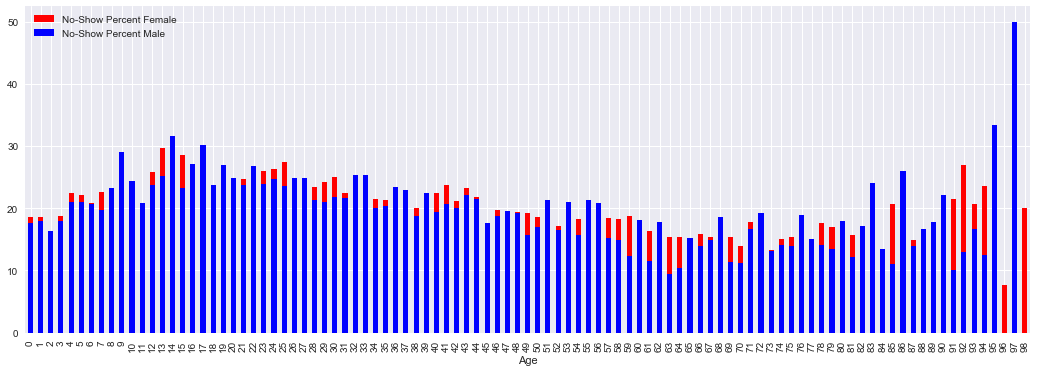

In [51]:
plt.figure(figsize=(20,5))
ax = df_ages_Combined.plot(x='Age',y='No-Show Percent Female',figsize=(18,6),kind='bar',color='red')
df_ages_Combined.plot(x='Age',y='No-Show Percent Male',ax=ax,kind='bar',color='blue')

Younger men tend to have a higher percentage of No-Show than younger Women and, older Women tend to have a higher percentage than Older Men and it appears that Men tend to have a higher No-show percentage than women. Lets put some numbers to this though.

In [52]:
# Add a new column to assess whether 
df_ages_Combined['Higher or Lower'] = df_ages_Combined['Age'].apply(lambda x : 
    df_ages_Combined['No-Show Percent Male'].loc[x]-df_ages_Combined['No-Show Percent Female'].iloc[x])

In [53]:
# Define a function to return whether number is positive or negative.
def M_or_F(x):
    """if x is positve return male, if negative return female
    """
    if x > 0:
        return 'M'
    elif x == 0:
        return 'N'
    else:
        return 'F'

In [54]:
df_ages_Combined['Higher or Lower Bin'] = df_ages_Combined['Higher or Lower'].apply(lambda x : M_or_F(x))

In [55]:
df_ages_Combined['Higher or Lower Bin'].value_counts()

F    58
M    41
Name: Higher or Lower Bin, dtype: int64

Interestingly this shows that Women overall have more ages where they have a greater percentage of No-Shows than Men. Now lets see what the differences are in young adults and middle age patients, using the arbitrary separations used earlier.

In [56]:
df_ages_Combined['Higher or Lower Bin'].loc[18:25].value_counts()

M    4
F    4
Name: Higher or Lower Bin, dtype: int64

In [57]:
df_ages_Combined['Higher or Lower Bin'].loc[45:75].value_counts()

F    21
M    10
Name: Higher or Lower Bin, dtype: int64

There is no difference between the two sexes for young adults, however middle age women have more ages where they have a higher percentage of No-shows compared to men.

## Conclusions

- Patients with scholarships appeared to have a higher percentage of not attending appointments
- Patients with co-morbidities tending to have a similar or lower percentage of not attending apppointments compared to the general population.
- Appears to be an increase in missed appointments as the time of day increases.
- Certain age groups appear to be more likely to miss appointments.

## Future Work

- Statisical tests of significance on some of the data gathered.
- Predictive modelling using clasification algorithms to predict when a patient will not show for an appointment. 